# 16: JOINTS USANDO EL MERGE

In [54]:
import pandas as pd
import numpy as np
import os
from IPython.display import Image # este pack es para poder poner imagenes en el notebook

In [79]:
# Cargamos los ficheros sobre los que trabajaremos

raiz = r"C:\Users\Usuario\Documents\05_Formación_Académica\Marc\Data_Science\machine_learning\Recursos_curso\datasets"
fichero_medallas = r"athletes\Medals.csv"
fichero_nacionalidades = r"athletes\Athelete_Country_Map.csv"
fichero_deportes = r"athletes\Athelete_Sports_Map.csv"

medallas = pd.read_csv(os.path.join(raiz, fichero_medallas), encoding = 'ISO-8859-1') # este dataset esta codificado diferente
nacionalidades = pd.read_csv(os.path.join(raiz, fichero_nacionalidades), encoding = 'ISO-8859-1') 
deportes = pd.read_csv(os.path.join(raiz, fichero_deportes), encoding = 'ISO-8859-1') 

### El concepto del JOINT

El JOINT consisite en juntar dos tablas relacionadas a través de una columna común en ambas tablas. Para ilustrar esto, trabajaremos con tablas que tienen en común el nombre de un atleta

In [5]:
# Visualizar que contiene el dataset de medallas

medallas.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6


In [7]:
# Visualizar que contiene el dataset de nacionalidades

nacionalidades.head()

,Athlete,Country
0,Michael Phelps,United States
1,Natalie Coughlin,United States
2,Aleksey Nemov,Russia
3,Alicia Coutts,Australia
4,Missy Franklin,United States


In [8]:
# Visualizar que contiene el dataset de deportes

deportes.head()

,Athlete,Sport
0,Michael Phelps,Swimming
1,Natalie Coughlin,Swimming
2,Aleksey Nemov,Gymnastics
3,Alicia Coutts,Swimming
4,Missy Franklin,Swimming


Como se puede ver, todos los datasets comparten la columna de 'Athlete'

In [10]:
# Lo lógico sería pensar que los 3 datasets comparten longitud pero podría ser que no. Lo comprobamos

print(f'El df de medallas tiene {len(medallas)} filas, de los cuales tenemos {len(medallas['Athlete'].unique().tolist())} atletas únicos')
print(f'El df de nacionalidades tiene {len(nacionalidades)} filas')
print(f'El df de deportes tiene {len(deportes)} filas')

El df de medallas tiene 8618 filas, de los cuales tenemos 6956 atletas únicos
El df de nacionalidades tiene 6970 filas
El df de deportes tiene 6975 filas


Como se puede ver, hay discrepacias. Mientras que en el datset de medallas tenemos 6956 atletas únicos, en los otros dataframes tenemos 6970 y 6975 atletas. Esto puede ser debido a que hay atletas que han practicado más de un deporte o han jugado para más de un país. 

In [11]:
# Comprobamos algunos atletas que estan duplicados por nacionalidad

nacionalidades[nacionalidades['Athlete'] == 'Aleksandar Ciric']

,Athlete,Country
1029,Aleksandar Ciric,Serbia
1086,Aleksandar Ciric,Serbia and Montenegro


In [12]:
# Comprobamos algunos atletas que estan duplicados por deporte

deportes[deportes['Athlete'] == 'Chen Jing']

,Athlete,Sport
1308,Chen Jing,Volleyball
1419,Chen Jing,Table Tennis


De este modo, habiendo duplicados, si hacemos el joint, se generaran varios N/A ya que habran más datos de un lado que de otro. Así pues, primero vamos a quitar los duplicados

In [14]:
# Quitar duplicados en los dataframes de nacionalidades y deportes

deportes = deportes.drop_duplicates(subset = 'Athlete') # si no especificamos que columna tener en cuenta, eliminará duplicados de todo
nacionalidades = nacionalidades.drop_duplicates(subset = 'Athlete')

In [15]:
# Volvemos a comprobar la longitud de los datos

# Lo lógico sería pensar que los 3 datasets comparten longitud pero podría ser que no. Lo comprobamos

print(f'El df de medallas tiene {len(medallas)} filas, de los cuales tenemos {len(medallas['Athlete'].unique().tolist())} atletas únicos')
print(f'El df de nacionalidades tiene {len(nacionalidades)} filas')
print(f'El df de deportes tiene {len(deportes)} filas')

El df de medallas tiene 8618 filas, de los cuales tenemos 6956 atletas únicos
El df de nacionalidades tiene 6956 filas
El df de deportes tiene 6956 filas


Ahora que ya tenemos las mismas filas, podemos comenzar con la unión. En esta ocasión vamos a juntar los datasets uno al lado del otro pero juntnado gracias a una columna en concreto.

In [20]:
# Juntar dos dataframes a través de la columna 'Athlete'

merged_df = pd.merge(right = medallas, left = nacionalidades,
                     right_on = 'Athlete', left_on = 'Athlete') # escogemos el nombre de las columnas que vamos a usar para juntar

In [21]:
merged_df.head()

,Athlete,Country,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Michael Phelps,United States,23.0,2008,08/24/2008,8,0,0,8
1,Michael Phelps,United States,19.0,2004,08/29/2004,6,0,2,8
2,Michael Phelps,United States,27.0,2012,08/12/2012,4,2,0,6
3,Natalie Coughlin,United States,25.0,2008,08/24/2008,1,2,3,6
4,Natalie Coughlin,United States,21.0,2004,08/29/2004,2,2,1,5


In [37]:
# Juntar con el otro dataframe

final_merged = pd.merge(left = merged_df, right = deportes,
                        left_on = 'Athlete', right_on = 'Athlete')

In [38]:
final_merged.head()

,Athlete,Country,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Sport
0,Michael Phelps,United States,23.0,2008,08/24/2008,8,0,0,8,Swimming
1,Michael Phelps,United States,19.0,2004,08/29/2004,6,0,2,8,Swimming
2,Michael Phelps,United States,27.0,2012,08/12/2012,4,2,0,6,Swimming
3,Natalie Coughlin,United States,25.0,2008,08/24/2008,1,2,3,6,Swimming
4,Natalie Coughlin,United States,21.0,2004,08/29/2004,2,2,1,5,Swimming


### Crear dataframes diversos para ejemplificar los diferentes tipos de JOINT

In [43]:
# Primero escogemos al azar deportistas que vamos a extraer de los diferentes dataframes para que haya discrepancias

np.random.seed(39441890)

deportistas_1 = np.random.choice(final_merged['Athlete'], # cogemos muestras de la columna Athlete
                               size = 30) # Cogemos una muestra de 10 sujetos
deportistas_2 = np.random.choice(final_merged['Athlete'], # cogemos muestras de la columna Athlete
                               size = 50) # Cogemos una muestra de 10 sujetos
deportistas_3 = np.random.choice(final_merged['Athlete'], # cogemos muestras de la columna Athlete
                               size = 70) # Cogemos una muestra de 10 sujetos

In [51]:
# Creamos los nuevos dataframes con menos datos

medallas_new = medallas[(~medallas['Athlete'].isin(deportistas_1)) & (medallas['Athlete'] != 'Michael Phelps')]
nacionalidades_new = nacionalidades[(~nacionalidades['Athlete'].isin(deportistas_2)) & (nacionalidades['Athlete'] != 'Michael Phelps')]
deportes_new = deportes[(~deportes['Athlete'].isin(deportistas_3)) & (deportes['Athlete'] != 'Michael Phelps')]

In [52]:
# Observamos los cambios que hemos hecho en los dataframes
medallas_new.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6
5,Alicia Coutts,24.0,2012,08/12/2012,1,3,1,5
6,Missy Franklin,17.0,2012,08/12/2012,4,0,1,5
7,Ryan Lochte,27.0,2012,08/12/2012,2,2,1,5


In [53]:
print(f'El df de medallas tiene {len(medallas_new)} filas, de los cuales tenemos {len(medallas_new['Athlete'].unique().tolist())} atletas únicos')
print(f'El df de nacionalidades tiene {len(nacionalidades_new)} filas')
print(f'El df de deportes tiene {len(deportes_new)} filas')

El df de medallas tiene 8569 filas, de los cuales tenemos 6925 atletas únicos
El df de nacionalidades tiene 6905 filas
El df de deportes tiene 6885 filas


### INNER JOINT

* Devuelve un data frame con las filas que tienen valor tanto en el primero como en el segundo data frame que estamos uniendo
* El número de filas será igual al número de filas **comunes** que tengas ambos data sets
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Inner Join B tendrá 30 filas
* En términos de teoría de conjuntos, se trata de la intersección de los dos conjuntos

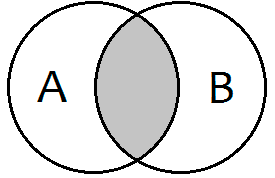

In [59]:
root = r"C:\Users\Usuario\Documents\05_Formación_Académica\Marc\Data_Science\machine_learning\Recursos_curso\notebooks"
Image(filename = os.path.join(root, r"resources\inner-join.png"))

In [60]:
# Con el inner joint solo tendremos los datos que coincidan entre las 2 bases de datos

inner_joint = pd.merge(left = nacionalidades_new, right = medallas, # Medallas si tiene a Michael Phelps, pero nacionalidades_new NO
                       how = 'inner',
                       left_on = 'Athlete', right_on = 'Athlete')

In [61]:
inner_joint.head()

,Athlete,Country,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
0,Natalie Coughlin,United States,25.0,2008,08/24/2008,1,2,3,6
1,Natalie Coughlin,United States,21.0,2004,08/29/2004,2,2,1,5
2,Natalie Coughlin,United States,29.0,2012,08/12/2012,0,0,1,1
3,Alicia Coutts,Australia,24.0,2012,08/12/2012,1,3,1,5
4,Missy Franklin,United States,17.0,2012,08/12/2012,4,0,1,5


In [62]:
inner_joint.tail()

,Athlete,Country,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals
8543,Olena Sadovnycha,Ukraine,32.0,2000,10/01/2000,0,1,0,1
8544,Kateryna Serdiuk,Ukraine,17.0,2000,10/01/2000,0,1,0,1
8545,Wietse van Alten,Netherlands,21.0,2000,10/01/2000,0,0,1,1
8546,Sandra Wagner-Sachse,Germany,31.0,2000,10/01/2000,0,0,1,1
8547,Rod White,United States,23.0,2000,10/01/2000,0,0,1,1


### LEFT / RIGHT JOINT

* Devuelve un data frame con las filas que tuvieran valor en el dataset de la izquierda / derecha, sin importar si tienen correspondencia en el de la derecha / izquierda o no.
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho / izquierdo, tendrán NAs en las columnas del data frame derecho / izquierdo.
* El número de filas será igual al número de filas del data frame izquierdo / derecho
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Entonces A Left Join B tendrá 60 filas
* En términos de teoría de conjuntos, se trata del propio data set de la izquierda / derecha quien, además tiene la intersección en su interior.

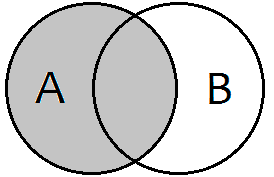

In [64]:
Image(filename = os.path.join(root, r"resources\left-join.png"))

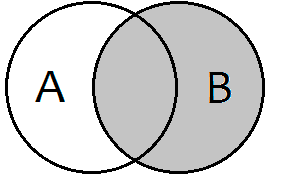

In [65]:
Image(filename = os.path.join(root, r"resources\right-join.png"))

In [66]:
# Ejemplo de left join. En el left join, todo lo que no esta en la B, aparece en el dataframe con N/A en el merge

left_join = pd.merge(left = medallas, right = nacionalidades_new, # medallas tiene a Michael Phelps, el otro NO
                     how = 'left',
                     left_on = 'Athlete', right_on = 'Athlete')

In [67]:
left_join.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,Michael Phelps,23.0,2008,08/24/2008,8,0,0,8,NaN
1,Michael Phelps,19.0,2004,08/29/2004,6,0,2,8,NaN
2,Michael Phelps,27.0,2012,08/12/2012,4,2,0,6,NaN
3,Natalie Coughlin,25.0,2008,08/24/2008,1,2,3,6,United States
4,Aleksey Nemov,24.0,2000,10/01/2000,2,1,3,6,NaN


In [68]:
left_join.tail()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8613,Olena Sadovnycha,32.0,2000,10/01/2000,0,1,0,1,Ukraine
8614,Kateryna Serdiuk,17.0,2000,10/01/2000,0,1,0,1,Ukraine
8615,Wietse van Alten,21.0,2000,10/01/2000,0,0,1,1,Netherlands
8616,Sandra Wagner-Sachse,31.0,2000,10/01/2000,0,0,1,1,Germany
8617,Rod White,23.0,2000,10/01/2000,0,0,1,1,United States


### OUTER JOINT

* Devuelve un data frame con todas las filas de ambos, reemplazando las ausencias de uno o de otro con NAs en la región específica..
* Las filas del data frame final que no correspondan a ninguna fila del data frame derecho (o izquierdo), tendrán NAs en las columnas del data frame derecho (o izquierdo).
* El número de filas será igual al máximo número de filas de ambos data frames
    * Data Set A tiene 60 filas
    * Data Set B tiene 50 filas
    * Ambos comparten 30 filas
    * Entonces A Outer Join B tendrá 60 + 50 - 30 = 80 filas
* En términos de teoría de conjuntos, se trata de la unión de conjuntos.

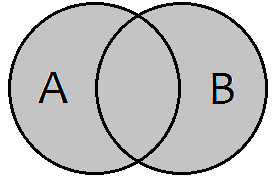

In [73]:
Image(filename = os.path.join(root, r"resources\outer-join.png"))

In [80]:
# Outer joint, lo que esta en A y no en B sale con N/A a lo largo del dataframe, y lo que esta en B y no en A, sale al final con N/A

outer_join = pd.merge(left = medallas, right = nacionalidades_new, # medallas tiene a Michael Phelps, el otro NO
                     how = 'outer',
                     left_on = 'Athlete', right_on = 'Athlete')

In [81]:
outer_join.head()

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
0,A. J. Mleczko,26.0,2002,02/24/2002,0,1,0,1,United States
1,Aaron Armstrong,30.0,2008,08/24/2008,0,1,0,1,Trinidad and Tobago
2,Aaron Egbele,25.0,2004,08/29/2004,0,0,1,1,Nigeria
3,Aaron Gate,21.0,2012,08/12/2012,0,0,1,1,New Zealand
4,Aaron McIntosh,28.0,2000,10/01/2000,0,0,1,1,New Zealand


In [78]:
outer_join.tail(5)

,Athlete,Age,Year,Closing Ceremony Date,Gold Medals,Silver Medals,Bronze Medals,Total Medals,Country
8613,NaN,NaN,2012,08/12/2012,0,1,0,1,Brazil
8614,NaN,NaN,2012,08/12/2012,0,1,0,1,Brazil
8615,NaN,NaN,2012,08/12/2012,0,1,0,1,Brazil
8616,NaN,NaN,2012,08/12/2012,0,1,0,1,Brazil
8617,NaN,NaN,2012,08/12/2012,0,1,0,1,Brazil
